#### Train a single network for 3 MNIST tasks sequentially

In [1]:
# automatically reload edited modules
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
from copy import deepcopy
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
# import class Model
from model import Model

F:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# mnist imshow convenience function
# input is a 1D array of length 784
def mnist_imshow(img):
    plt.imshow(img.reshape([28,28]), cmap="gray")
    plt.axis('off')

# return a new mnist dataset w/ pixels randomly permuted
def permute(mnist):
    perm_inds = list(range(mnist.train.images.shape[1]))
    np.random.shuffle(perm_inds)
    mnist2 = deepcopy(mnist)
    sets = ["train", "validation", "test"]
    for set_name in sets:
        this_set = getattr(mnist2, set_name) # shallow copy
        this_set._images = np.transpose(np.array([this_set.images[:,c] for c in perm_inds]))
    return mnist2

In [3]:
# classification accuracy plotting
def plot_test_acc(plot_handles):
    plt.legend(handles=plot_handles, loc="center right")
    plt.xlabel("Iterations")
    plt.ylabel("Test Accuracy")
    plt.ylim(0,1)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
# train/compare vanilla sgd and ewc
def train_task1(model, num_iter, disp_freq, trainset, testsets, x,y1,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss1()
        else:
            model.update_MAS_loss1(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:                
                for task in range(len(testsets)):
                    feed_dict={x: testsets[task].test.images, y1: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy1.eval(feed_dict=feed_dict)                   
            model.train_step1.run(feed_dict={x: batch[0], y1: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs


def train_task2(model, num_iter, disp_freq, trainset, testsets, x,y2,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss2()
        else:
            model.update_MAS_loss2(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:                
                for task in range(len(testsets)):
                    feed_dict={x: testsets[task].test.images, y2: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy2.eval(feed_dict=feed_dict)                    
            model.train_step2.run(feed_dict={x: batch[0], y2: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

def train_task3(model, num_iter, disp_freq, trainset, testsets, x,y3,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss3()
        else:
            model.update_MAS_loss3(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:                
                for task in range(len(testsets)):                    
                    feed_dict={x: testsets[task].test.images, y3: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy3.eval(feed_dict=feed_dict)                    
            model.train_step3.run(feed_dict={x: batch[0], y3: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

def train_task4(model, num_iter, disp_freq, trainset, testsets, x,y4,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss4()
        else:
            model.update_MAS_loss4(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:              
                for task in range(len(testsets)):
                    feed_dict={x: testsets[task].test.images, y4: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy4.eval(feed_dict=feed_dict)                   
            model.train_step4.run(feed_dict={x: batch[0], y4: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

def train_task5(model, num_iter, disp_freq, trainset, testsets, x,y5,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss5()
        else:
            model.update_MAS_loss5(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:               
                for task in range(len(testsets)):
                    
                    feed_dict={x: testsets[task].test.images, y5: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy5.eval(feed_dict=feed_dict)                  
                    
            model.train_step5.run(feed_dict={x: batch[0], y5: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

def train_task6(model, num_iter, disp_freq, trainset, testsets, x,y6,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss6()
        else:
            model.update_MAS_loss6(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:                
                for task in range(len(testsets)):
                   
                    feed_dict={x: testsets[task].test.images, y6: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy6.eval(feed_dict=feed_dict)
                 
            model.train_step6.run(feed_dict={x: batch[0], y6: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

def train_task7(model, num_iter, disp_freq, trainset, testsets, x,y7,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss7()
        else:
            model.update_MAS_loss7(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:
                
                for task in range(len(testsets)):                   
                    feed_dict={x: testsets[task].test.images, y7: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy7.eval(feed_dict=feed_dict)
                  
            model.train_step7.run(feed_dict={x: batch[0], y7: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

def train_task8(model, num_iter, disp_freq, trainset, testsets, x,y8,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss8()
        else:
            model.update_MAS_loss8(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:              
                for task in range(len(testsets)):
                   
                    feed_dict={x: testsets[task].test.images, y8: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy8.eval(feed_dict=feed_dict)
                 
            model.train_step8.run(feed_dict={x: batch[0], y8: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

def train_task9(model, num_iter, disp_freq, trainset, testsets, x,y9,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss9()
        else:
            model.update_MAS_loss9(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:
               
                for task in range(len(testsets)):
                   
                    feed_dict={x: testsets[task].test.images, y9: testsets[task].test.labels,keep_prob:1.0}
                    test_accs[task][iter//disp_freq] = model.accuracy9.eval(feed_dict=feed_dict)
                        
                   
            model.train_step9.run(feed_dict={x: batch[0], y9: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

def train_task10(model, num_iter, disp_freq, trainset, testsets, x,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,keep_prob,lams):    
    for l in range(len(lams)):
        # lams[l] sets weight on old task(s)
        model.restore(sess) # reassign optimal weights from previous training session
        if(lams[l] == 0):
            model.set_vanilla_loss10()
        else:
            model.update_MAS_loss10(lams[l])
        # initialize test accuracy array for each task   
        test_accs = []
        for task in range(len(testsets)):
            test_accs.append(np.zeros(num_iter//disp_freq))
        # train on current task
        for iter in range(num_iter):
            batch = trainset.train.next_batch(256)            
            if iter % disp_freq == 0:
                plt.subplot(1, len(lams), l+1)
                plots = []
                colors = ['r', 'b', 'g','y','k','#FAEBD7', '#7FFFD4', '#8A2BE2', '#A52A2A', '#DEB887']
                for task in range(len(testsets)):
                    if task==0:
                        feed_dict={x: testsets[task].test.images, y1: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy1.eval(feed_dict=feed_dict)
                    elif task==1:
                        feed_dict={x: testsets[task].test.images, y2: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy2.eval(feed_dict=feed_dict)
                    elif task==2:
                        feed_dict={x: testsets[task].test.images, y3: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy3.eval(feed_dict=feed_dict)      
                    elif task==3:
                        feed_dict={x: testsets[task].test.images, y4: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy4.eval(feed_dict=feed_dict)
                    elif task==4:
                        feed_dict={x: testsets[task].test.images, y5: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy5.eval(feed_dict=feed_dict)
                    elif task==5:
                        feed_dict={x: testsets[task].test.images, y6: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy6.eval(feed_dict=feed_dict)
                    elif task==6:
                        feed_dict={x: testsets[task].test.images, y7: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy7.eval(feed_dict=feed_dict)
                    elif task==7:
                        feed_dict={x: testsets[task].test.images, y8: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy8.eval(feed_dict=feed_dict)
                    elif task==8:
                        feed_dict={x: testsets[task].test.images, y9: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy9.eval(feed_dict=feed_dict)
                    else:
                        feed_dict={x: testsets[task].test.images, y10: testsets[task].test.labels,keep_prob:1.0}
                        test_accs[task][iter//disp_freq] = model.accuracy10.eval(feed_dict=feed_dict)
                        
                    c = chr(ord('A') + task)
                    plot_h, = plt.plot(range(1,iter+2,disp_freq), test_accs[task][:iter//disp_freq+1], colors[task], label="task " + c)
                    plots.append(plot_h)
                plot_test_acc(plots)
                if l == 0: 
                    plt.title("sgd frozen")
                else:
                    plt.title("MAS")
                plt.gcf().set_size_inches(len(lams)*5, 3.5)
            model.train_step10.run(feed_dict={x: batch[0], y10: batch[1],keep_prob:0.5})
            #print("训练精度：",model.accuracy.eval(feed_dict={x: batch[0], y_: batch[1],keep_prob:0.5}))
    return test_accs

In [4]:
# 下载mnist数据集
mnist = input_data.read_data_sets('data/mnist', one_hot=True)

sess = tf.InteractiveSession()
# define input and target placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y1 = tf.placeholder(tf.float32, shape=[None, 10])
y2 = tf.placeholder(tf.float32, shape=[None, 10])
y3 = tf.placeholder(tf.float32, shape=[None, 10])
y4 = tf.placeholder(tf.float32, shape=[None, 10])
y5 = tf.placeholder(tf.float32, shape=[None, 10])
y6 = tf.placeholder(tf.float32, shape=[None, 10])
y7 = tf.placeholder(tf.float32, shape=[None, 10])
y8 = tf.placeholder(tf.float32, shape=[None, 10])
y9 = tf.placeholder(tf.float32, shape=[None, 10])
y10 = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob=tf.placeholder(tf.float32)
# instantiate new model
model = Model(x,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,keep_prob) # simple 3-layer network
# initialize variables
sess.run(tf.global_variables_initializer())
mnist1 = permute(mnist)
mnist2 = permute(mnist)
mnist3 = permute(mnist)
mnist4 = permute(mnist)
mnist5 = permute(mnist)
mnist6 = permute(mnist)
mnist7 = permute(mnist)
mnist8 = permute(mnist)
mnist9 = permute(mnist)
mnist10 = permute(mnist)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Extracting data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### train on task A, test on task A

In [5]:
# training 1st task
acc1=train_task1(model, 10000, 200, mnist1, [mnist1], x,y1,keep_prob,lams=[0])
print("1th task acc:",acc1[0][-1])

# save current optimal weights
model.star()


1th task acc: 0.9083999991416931


#### train on task B, test on tasks A and B

In [6]:
acc2=train_task2(model, 10000, 200, mnist2, [mnist2], x,y2,keep_prob,lams=[0])
print("2th task acc:",acc2[0][-1])
model.star()


2th task acc: 0.8303999900817871


# train on task C, test on tasks A, B, and C

In [7]:
acc3=train_task3(model, 10000, 200, mnist3, [mnist3], x,y3,keep_prob,lams=[0])
print("3th task acc:",acc3[0][-1])
model.star()


3th task acc: 0.8238999843597412


#### train on task C, test on tasks A, B, C and D

In [8]:
acc4=train_task4(model, 10000, 200, mnist4, [mnist4], x,y4,keep_prob,lams=[0])
print("4th task acc:",acc4[0][-1])
model.star()


4th task acc: 0.833299994468689


In [9]:
acc5=train_task5(model, 10000, 200, mnist5, [mnist5],x,y5,keep_prob,lams=[0])
print("5th task acc:",acc5[0][-1])
model.star()

5th task acc: 0.8269000053405762


In [10]:
acc6=train_task6(model, 10000, 200, mnist6, [mnist6],x,y6,keep_prob,lams=[0])
print("6th task acc:",acc6[0][-1])
model.star()


6th task acc: 0.824999988079071


In [11]:
acc7=train_task7(model, 10000, 200, mnist7, [mnist7],x,y7,keep_prob,lams=[0])
print("7th task acc:",acc7[0][-1])
model.star()

7th task acc: 0.820900022983551


In [12]:
acc8=train_task8(model, 10000, 200, mnist8, [mnist8],x,y8,keep_prob,lams=[0])
print("8th task acc:",acc8[0][-1])
model.star()


8th task acc: 0.8241000175476074


In [13]:
acc9=train_task9(model, 10000, 200, mnist9, [mnist9],x,y9,keep_prob,lams=[0])
print("9th task acc:",acc9[0][-1])
model.star()

9th task acc: 0.8155999779701233


1th task acc: 0.9093999862670898 2th task acc: 0.8310999870300293 3th task acc: 0.8260999917984009 4th task acc: 0.8339999914169312 5th task acc: 0.8263999819755554 6th task acc: 0.8256000280380249 7th task acc: 0.8223000168800354 8th task acc: 0.8241000175476074 9th task acc: 0.8174999952316284 10th task acc: 0.817799985408783
九个任务的平均遗忘程度： -0.0008888906902737088
十个任务的ACC为： 0.8334299981594085


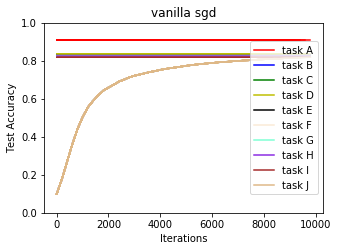

In [14]:
acc10=train_task10(model, 10000, 200, mnist10, [mnist1, mnist2, mnist3, mnist4,mnist5,mnist6,mnist7,mnist8,
                                                mnist9,mnist10],x,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,keep_prob,lams=[0])
print("1th task acc:",acc10[0][-1],"2th task acc:",acc10[1][-1],
      "3th task acc:",acc10[2][-1],"4th task acc:",acc10[3][-1],"5th task acc:",acc10[4][-1],"6th task acc:",acc10[5][-1],
      "7th task acc:",acc10[6][-1],"8th task acc:",acc10[7][-1],"9th task acc:",acc10[8][-1],"10th task acc:",acc10[9][-1])
###性能度量：计算遗忘程度
F9=(acc1[0][-1]-acc10[0][-1]+acc2[0][-1]-acc10[1][-1]+acc3[0][-1]-acc10[2][-1]+acc4[0][-1]-acc10[3][-1]+acc5[0][-1]-acc10[4][-1]
    +acc6[0][-1]-acc10[5][-1]+acc7[0][-1]-acc10[6][-1]+acc8[0][-1]-acc10[7][-1]+acc9[0][-1]-acc10[8][-1])/9 #计算九个任务的平均遗忘程度
print("九个任务的平均遗忘程度：",F9)
ACC10=(acc10[0][-1]+acc10[1][-1]+acc10[2][-1]+acc10[3][-1]+acc10[4][-1]+acc10[5][-1]+acc10[6][-1]+acc10[7][-1]
      +acc10[8][-1]+acc10[9][-1])/10
print("十个任务的ACC为：",ACC10)
model.star()